In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
dataframe = pd.read_csv('cleaned_crabs.csv')

In [3]:
dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class
0,0,blue,male,1,8.1,6.7,16.1,19.0,7.0,bluemale
1,1,blue,male,2,8.8,7.7,18.1,20.8,7.4,bluemale
2,2,blue,male,3,9.2,7.8,19.0,22.4,7.7,bluemale
3,3,blue,male,4,9.6,7.9,20.1,23.1,8.2,bluemale
4,4,blue,male,5,9.8,8.0,20.3,23.0,8.2,bluemale


In [4]:
dataframe.tail()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class
195,195,orange,female,46,21.4,18.0,41.2,46.2,18.7,orangefemale
196,196,orange,female,47,21.7,17.1,41.7,47.2,19.6,orangefemale
197,197,orange,female,48,21.9,17.2,42.6,47.4,19.5,orangefemale
198,198,orange,female,49,22.5,17.2,43.0,48.7,19.8,orangefemale
199,199,orange,female,50,23.1,20.2,46.2,52.5,21.1,orangefemale


### Standarizing Data :

Standardizing is the process of transforming the values of features in a dataset to have a mean of 0 and a standard deviation of 1. This technique is also known as Z-score normalization or standard scaling.



1. **Standard Scaling (Z-score normalization):**
   - Standardizes features by transforming them to have a mean of 0 and a standard deviation of 1.
   - Formula: \[X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)}\]
   - Suitable when the data follows a Gaussian distribution and for algorithms sensitive to the scale of features, such as gradient-based methods.



In [5]:
data_columns = ['frontal_lobe', 'rear_width', 'carapace_midline', 'maximum_width', 'body_depth']

standarized_dataframe = dataframe.copy()
standarized_dataframe[data_columns] = StandardScaler().fit_transform(standarized_dataframe[data_columns])

In [6]:
standard_dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class
0,0,blue,male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,bluemale
1,1,blue,male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,bluemale
2,2,blue,male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,bluemale
3,3,blue,male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,bluemale
4,4,blue,male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,bluemale


## Linear Discriminant Analysis ( LDA ) :

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used for classification and feature extraction. It aims to find a linear combination of features that characterizes or separates two or more classes in a dataset. The key idea is to maximize the distance between the means of different classes while minimizing the spread (variance) within each class. LDA is often used in the context of pattern recognition and machine learning to improve classification performance by reducing the number of features and emphasizing those that contribute most to class separation.

### LDA Analysis on 2 Dimensions :

In [8]:
lda = LinearDiscriminantAnalysis(n_components = 2)

lda_dataframe = lda.fit_transform(standarized_dataframe[data_columns].values, 
                                  y = standarized_dataframe['class'])
standarized_dataframe[['LDA1', 'LDA2']] = lda_dataframe

In [10]:
standarized_dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class,LDA1,LDA2
0,0,blue,male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,bluemale,1.538869,-0.808137
1,1,blue,male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,bluemale,1.637047,-0.370588
2,2,blue,male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,bluemale,2.802492,-0.249383
3,3,blue,male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,bluemale,2.295358,-1.029487
4,4,blue,male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,bluemale,1.732949,-1.119930


<AxesSubplot: xlabel='LDA1', ylabel='LDA2'>

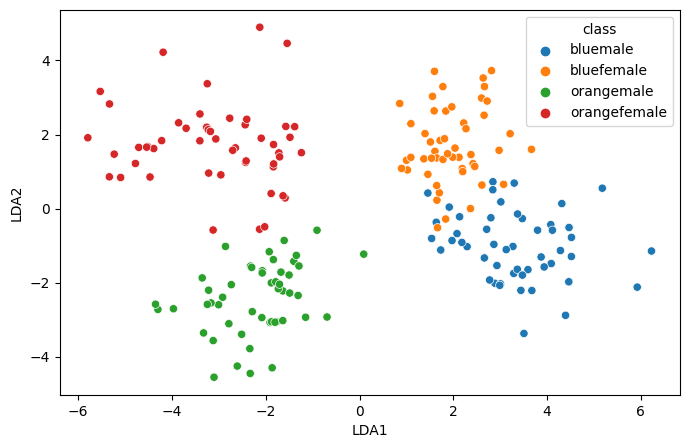

In [11]:
fig = plt.figure(figsize = (8, 5))
sns.scatterplot(x = standarized_dataframe.LDA1, 
                y = standarized_dataframe.LDA2, 
                hue = 'class', 
                data = standarized_dataframe)

### LDA Analysis on 3 Dimensions :

In [12]:
lda = LinearDiscriminantAnalysis(n_components = 3)

lda_dataframe = lda.fit_transform(standarized_dataframe[data_columns].values, 
                                  y = standarized_dataframe['class'])
standarized_dataframe[['LDA1', 'LDA2', 'LDA3']] = lda_dataframe

In [14]:
standarized_dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class,LDA1,LDA2,LDA3
0,0,blue,male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,bluemale,1.538869,-0.808137,1.186420
1,1,blue,male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,bluemale,1.637047,-0.370588,1.172750
2,2,blue,male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,bluemale,2.802492,-0.249383,0.502351
3,3,blue,male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,bluemale,2.295358,-1.029487,0.814667
4,4,blue,male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,bluemale,1.732949,-1.119930,0.728544


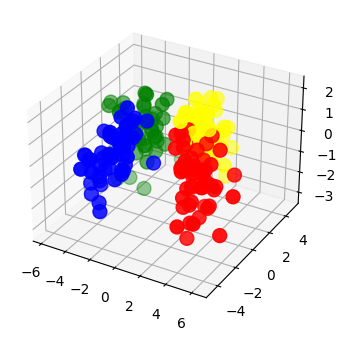

In [16]:
fig = plt.figure(figsize = (8, 4))

crab_colors = {'bluemale':'red', 
               'bluefemale':'yellow', 
               'orangemale':'blue', 
               'orangefemale':'green'}

ax = fig.add_subplot(111, projection = '3d')

plt.scatter(x = standarized_dataframe.LDA1, 
            y = standarized_dataframe.LDA2, 
            zs = standarized_dataframe.LDA3, 
            c = standarized_dataframe['class'].apply (lambda x: crab_colors[x]), s = 100)
